# Quanutm Computing in the context of graphs and hypergraphs

Sebastian Zając

## Introduction

In this tutorial, we show how to solve binary combinatorial optimization problems (Max-Cut) using the **Quantum Approximate Optimization Algorithm (QAOA)**. 

The main paper on this algorithm is by E. Farhi, J. Goldstone, and S. Gutmann, "A Quantum Approximate Optimization Algorithm", arXiv: 1411.4028 (2014).


The QAOA algorithm belongs to the class of **hybrid quantum algorithms** that could be run on **noisy intermediate-scale quantum** (NISQ) computers (quantum coprocessors).

It is important to say that, given the classical nature of combinatorial problems, the exponential speedup in using quantum computers compared to the best classical algorithms is not guaranteed.

### What is Quantum Computing?

**Quantum computing** is a multidisciplinary field comprising aspects of computer science, physics, and mathematics that **utilizes quantum mechanics to solve complex problems faster than on classical computers**. 

**COMPUTER SCIENCE Moore Law** 

An observation that the number of transistors on microchip roughly doubles every two years, whereas its cost is halved over that same timeframe.

**PHYSICS limitations**

- transistor size
- high power consumpion
- heat

Quantum computers are able to solve certain types of problems faster than classical computers by taking advantage of quantum mechanical effects, such as `superposition`, `entanglement` and `quantum interference`. 

Some applications where quantum computers can provide such a speed boost include machine learning, optimization, and simulation of physical systems. 

<img src="img\nobel.png" width=300 height=200>

### short history

- 1936 A. Turing "On Computable Numbers,..." universal computing machine
- 1980 P. Benioff - "The computer as a physical system: ..." 
> "In this paper a microscopic quantum mechanical model of computers as represented by Turing machines is constructed. ..."
- 1981 R. Feynman
> Nature isn't classical, dammit, and if you want to make a simulation of nature, you'd better make it quantum mechanical, and by golly, it's a wonderful problem because it doesn't look so easy.""

- 1994 Peter Shor "Algotithm for quantum computation: discrete logarithms and factoring"
- 1996 Lov Grover - "A fast quantum mechanical algorithm for database search"
- 2000 first 5-qubit QC 
- 2011 first commercial "Quantum" D-Vave Computer
- 2019 Quantum supremacy Google 
> demonstrating that a programmable quantum device can solve a problem that no classical computer can solve in any feasible amount of time.
- ...


### Quick start 

- [Quantum lab](https://quantum-computing.ibm.com) - IBM Qiskit Python 
- [D-Wave](https://www.dwavesys.com/build/getting-started/) - Python
- [Xanadu](https://www.xanadu.ai) - Pennylane Python library
- [Amazon braket](https://aws.amazon.com/braket/) - AWS Python, Julia
- QPoland as part of QWorld - Washington DC/Toronto Quantum Computing Meetup

## The types of quantum computing models

[List of quantum processors](https://en.wikipedia.org/wiki/List_of_quantum_processors)

### Quantum annealing

QA is an optimization process for finding the global minimum of a given objective function over a given set of candidate solutions.
Quantum annealing is used mainly for problems where the search space is discrete (combinatorial optimization problems) with many local minima:
- finding the ground state of a spin glass
- the traveling salesman problem. 

D-Wave's architecture differs from traditional quantum computers.

It is not known to be polynomially equivalent to a universal quantum computer and, in particular, cannot execute Shor's algorithm because Shor's algorithm is not a hillclimbing process (Shor's algorithm requires a universal quantum computer). 


### Topological Quantum model 

Topological quantum computers are equivalent in computational power to other standard models of quantum computation.

Certain algorithms may be a more natural fit to the topological quantum computer model. 

ex: algorithms for evaluating the Jones polynomial were first developed in the topological model, and only later converted and extended in the standard quantum circuit model.

### Gate model 

Classical computations: 

<img src="img/bramki.png" width=250 height=200>

Quantum computations: 

![](https://qiskit.org/documentation/_images/quantum_interference.png)

When considering quantum circuits, it is often convenient to define them by a series of quantum gates - reversible transformations on the quantum data stored in `qubits`.

<img src="img/bity.png" width=400 height=300>

<img src="img/kubit1.png" width=250 height=200>

In [ ]:
!pip install qiskit -q

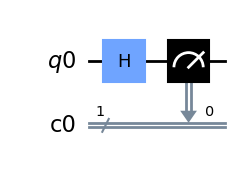

In [4]:
# simple quantum circuit run on simulator

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.measure(qr[0], cr[0])


qc.draw("mpl")

In [5]:
from qiskit_aer import AerSimulator

backend_sim = AerSimulator()

# run the circuit
rc = backend_sim.run(qc)
# get the results
rc = rc.result()
# retrieve the bitstring counts
counts = rc.get_counts()

print(f"Counts: {counts}")

Counts: {'1': 515, '0': 509}


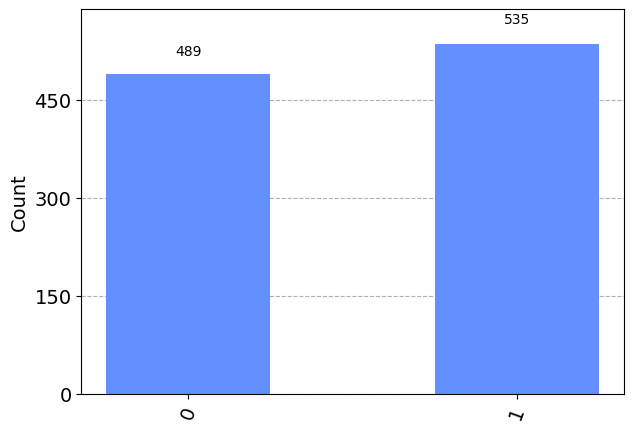

In [3]:
from qiskit.visualization import *

# plot histogram
plot_histogram(counts)

Quantum gates are realised by `unitary operators` $U U^{\dagger} = U^{\dagger} U = I $ represented by matricies.

Each Unitary matrix can be defined as:
$$ U(H,t) = e^{-i H t}$$
where $H$ is Hemitian matrix ($H=H^{\dagger}$)

In general, implementing a quantum circuit that exactly exponentiates a Hamiltonian with many non-commuting terms, i.e., a Hamiltonian of the form
$$ H = H_1 + H_2 + \dots + H_n$$ 
is very challenging. Instead, we can use the `Trotter-Suzuki` decomposition formula:
$$ e^{A + B} \approx \left( e^{A/n} e^{B/n} \right)^n $$ so 
for $H=\sum_k H_k$ we get $$ U(H,t,n) = \prod_{j=1}^n \prod_k e^{-i H_k t/n} $$

## Quadratic Binary Optimization problems 

Combinatorial optimization problems are ubiquitous across many areas of science and application areas. 

- logistics, 
- scheduling, 
- planning, 
- portfolio optimization
- ...

Combinatorial optimization problems are problems involving a large number of yes/no decisions with each set of decisions yielding a corresponding objective function value, like a cost or profit value.

Because of the combinatorial explosion of the solution space with the number of variables, finding good solutions is extremely difficult.

The QUBO model unifies a rich variety of NP-hard combinatorial optimization problems:

- Quadratic Assignment Problems 
- Capital Budgeting Problems
- Task allocation Problems
- Maximum--Cut Problems

The QUBO objective function:

$$ F(q) = \sum_a v_a q_a + \sum_{a < b} \omega_{a b} q_a q_b $$
where $q_a \in \{0,1\}$, $v_a$ and $\omega_a$ are real coefficients for the linear and quadratic parts. 
The QUBO objective function is NP-hard in nature.

Let's change the variables: $$z_a = 2q_a-1$$ where $z \in {-1,1}$
$$F(z) = \sum_a h_a z_a + \sum_{a < b} J_{a b} z_a z_b $$ 

One popular method of encoding an optimization problem to be solved using QAOA, is to first formulate the problem as an `Ising Objective function`. The Ising model is a popular statistical mechanics model, associated primarily with ferromagnetism. Because it has been shown to be NP-Complete in nature, the objective function associated with it can be used to represent hard problems.

### Max-Cut

**Max-Cut** is an NP-complete problem, with applications in clustering, network science, and statistical physics. 

Given a graph $G(V,E)$, we seek partition of $V$ into two subsets with maximum cut. 

In short, we have to color every node either blue or red and we score a point whenever an edge connects two nodes with different colors. We then would like to find the solution with the highest score. 


<img src="img\qaoa_maxcut.png" height="300" >

Again, the problem in this specific graph coloring problem is that there are $2^N$ possible solutions for $N$ nodes (an exponential explosion in possibilities), making it impossible to enumerate all possible candidates for relevant system sizes.

The solution of Max-Cut, even if approximate, has practical application in machine scheduling, image recognition or for the layout of electronic circuits.

We can encode the `Maximum Cut` problem as a minimization problem of an Ising Hamiltonian, where the (classical) cost function reads:
$$ H_C = \sum_{a < b} J_{a b} z_a z_b $$ 

Ising matrix $J$ encoding the weights of the edges.

In short, the cost Hamiltonian assigns a number to every bitstring $z=(z_1,z_2,\dots,z_n)$
, and we would like to find the lowest number possible. This will be the optimal assignment and solution to our problem.

It is important to note here that we still don’t know if quantum computing can help solve NP-Complete problems efficiently. 
Our hope for quantum algorithms, at the very least, is to be able to compete with classical heuristics when it comes to certain classes of hard problems.


The quantum Ising Hamiltonian, which naturally maps the Ising objective to qubits:

$$\hat{C} = \sum_{a < b} J_{a b} \hat{\sigma}_a^z \hat{\sigma}_b^z $$ 
which can be written as a matrix of size $(2^N, 2^N)$ with diagonal elements only corresponding to all possible classical values for the cost function $\hat{C}$.

Because qubits are 2-dim vectors $\sigma_a^z$ correspond to 2x2 matrix with two eigenvalue $\{1,-1\}$ and two eigenvectors $$|0> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$
$$|1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

So

$$ \sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

and 

$$ \sigma^z_a = \left( \otimes_{i=1}^{a-1} I \right) \otimes \left( \sigma^z \right) \otimes \left(\otimes_{i=a+1}^{n} I \right)$$


The other type of Hamiltonian in the QAOA process is a summation of individual Pauli X operators for each qubit involved in the process, which intuitively represents $$\hat{B}=\sum_a \sigma^x_a$$ transverse field in the Ising model
$$ \sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

$$ \sigma^x_a = \left( \otimes_{i=1}^{a-1} I \right) \otimes \left( \sigma^x \right) \otimes \left(\otimes_{i=a+1}^{n} I \right)$$

The ground state of this Hamiltonian corresponds to the optimal solution of the classical combinatorial problem.

Finding this ground state is generically hard.

### QAOA proposition 

To approximate this groundstate, QAOA prepares a parametrized `ansatz state` (corresponding to a parameterized gate sequence), whose parameters are iteratively updated by a classical optimizer in a closed loop.

A good approximate solutions to the problem class considered here can be found by preparing the variational state:

$$ |\gamma \beta > = U_x(\beta_p) U_{zz}(\gamma_p) \dots U_x(\beta_1) U_{zz}(\gamma_1) |s> $$

where: 
$$U_x(\beta) = e^{-i \beta \hat{B}}$$
,

$$U_{zz}(\gamma) = e^{-i \gamma \hat{C}}$$

We start initially from a product of $\sigma^x$ eigenstates: 
$$|s> = |+> = \frac{1}{\sqrt{2}}(|0> + |1>)$$

The depth $p$ can be interpreted as a hyperparameter.

For $p$ layers of QAOA blocks, there are $2p$  classical parameters to optimize over, since each layer $k$ is characterized by just two variational parameters $\beta_k \in [0,\pi], \gamma_k \in [0,2\pi]$.

The next step is to find the optimal parameters $(\beta_{opt}, \gamma_{opt})$ such that the expectation value $$ <\beta_{opt},\gamma_{opt} | H | \beta_{opt},\gamma_{opt}>$$ is minimal

<img src="img/QAOA_schematic.png" width=400  >

## Code realization

Functional programming breaks down an application into a set of functions. 
Ideally, functions only take inputs and produce outputs and have no internal state that affects the output produced for a given input.

In that sense, the `QAOA algorithm` is a function that solves a `problem` by `optimize`ing a set of `params`. In other words, we aim to find the best values for these params.

To decide which params are best, we assess them based on the result we obtain from `compute`ing a (quantum) circuit that uses these params to encode the `problem` (problem_circuit) and its solution (ansatz_circuit).

This is what Qiskit’s description refers to as a variational algorithm. 

It uses a classical optimization algorithm that makes queries to a quantum computer.


In [6]:
def qaoa(problem, optimize, assess, compute,
  to_circuit, problem_circuit, ansatz_circuit):

    return optimize(
        lambda params: assess(problem, compute(to_circuit(problem, params,
              problem_circuit, ansatz_circuit)))
    )

In [7]:
qaoa()

TypeError: qaoa() missing 7 required positional arguments: 'problem', 'optimize', 'assess', 'compute', 'to_circuit', 'problem_circuit', and 'ansatz_circuit'

In [8]:
from qiskit import Aer, execute

def compute(circuit):
    return execute(circuit, 
                   Aer.get_backend('qasm_simulator'), 
                   shots=1000).result().get_counts()

In [9]:
from qiskit import QuantumCircuit

def to_circuit(problem, params, problem_circuit, ansatz_circuit):
    
    cnt_qubits = problem.size
    
    qc_qaoa = QuantumCircuit(cnt_qubits)

    # initial_state
    qc_qaoa.h(range(cnt_qubits))
    
    # append problem circuit
    qc_qaoa.append(problem_circuit(problem, params[0]), range(cnt_qubits))
    
    # append ansatz circuit
    qc_qaoa.append(ansatz_circuit(problem, params[1]), range(cnt_qubits))
    qc_qaoa.measure_all()
    
    return qc_qaoa

This function takes the `problem` and the `params`.
We use the `size` of the problem to determine the number of quantum bits (qubits) in our quantum circuit.

A qubit is the basic unit of computation in a quantum computer. 
Even though its internal state is pretty complicated, when you look at it, it is either 0 or 1 — just like a regular bit.

We start with applying the Hadamard gate to all qubits. This puts the qubits into a state where they are equally likely to result in 0 and 1 (superposition state).

Then, we append two sub-circuits using the functions `problem_circuit` and `ansatz_circuit`.

This is what Qiskit’s explanation refers to as **“the unitary $U(\beta,\gamma)$ has a specific form and is composed of two unitaries $U(\beta)$ and $U(\gamma)$ ...”**

The first function `problem_circuit` adds a quantum circuit representing the problem we aim to solve.

In [10]:
def problem_circuit(problem, gamma):
    qc_p = QuantumCircuit(problem.size)
    for i, j in problem.relations:
        qc_p.rzz(gamma, i, j)
        qc_p.barrier()
    return qc_p

In this case, we loop through all relations in our problem. Apparently, we expect a relation to consist of a pair of integer values (i, j). 

We apply the rzz gate on the two qubits at these positions. 

The rzz gate is a parameterized (by parameter gamma) rotation around the ZZ-axis of a two-qubit system.

The second function ansatz_circuit adds a quantum circuit representing the solution to our problem.

In [11]:
def ansatz_circuit(problem, beta):
    qc_a = QuantumCircuit(problem.size)
    for i in range(problem.size):
        qc_a.rx(beta, i)
    return qc_a

This time, we loop through all parts of our problem and apply the rx gate on the respective qubit. This is a parameterized (by parameter beta) rotation around the X-axis of a qubit.

In [12]:
def assess(problem, result):
    avg = 0
    sum_count = 0
    for solution, count in result.items():
        performance = 0
        for i, j in problem.relations:
            if solution[i] != solution[j]:
                performance -= 1

        avg += performance * count
        sum_count += count
    return avg/sum_count

In [13]:
from scipy.optimize import minimize

def optimize(f_params_to_problem):
    return minimize(
        # callable function
        f_params_to_problem,
        
        # initial guess on beta and gamma
        [1.0, 1.0],
        
        # optimization method
        method='COBYLA')

In [14]:
class Problem():
    def __init__(self, nodes, relations):
        self._nodes = nodes
        self._relations = relations
    
    @property
    def size(self) -> int:
        return len(self._nodes)
    
    @property
    def relations(self) -> list:
        return self._relations
    
    @property
    def nodes(self) -> list:
        return self._nodes

In [15]:
problem = Problem([0, 1, 2, 3], [(0, 1), (1, 2),(2,3),(3,0)])

result = qaoa(
  problem, optimize, assess, compute,
  to_circuit, problem_circuit, ansatz_circuit
)

In [16]:
result

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.994
       x: [ 2.223e+00  8.540e-01]
    nfev: 27
   maxcv: 0.0

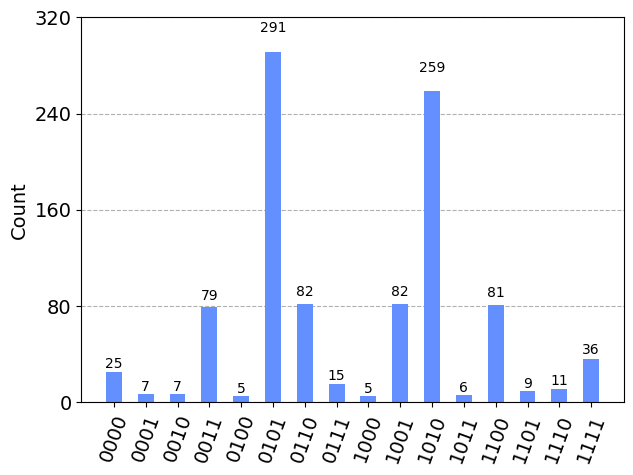

In [17]:
from qiskit.visualization import plot_histogram

plot_histogram(compute(to_circuit(
  problem, result.x, problem_circuit, ansatz_circuit
)))

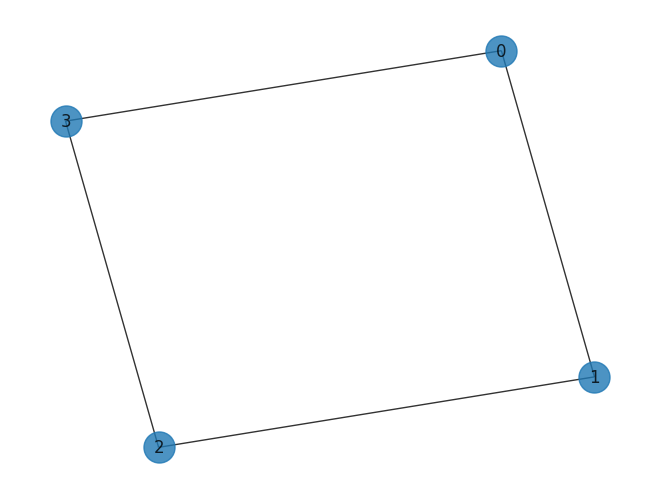

In [18]:
import networkx as nx
graph = nx.Graph()
graph.add_nodes_from([0, 1, 2, 3])
graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(graph, with_labels=True, alpha=0.8, node_size=500)

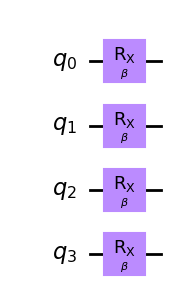

In [19]:
from qiskit import QuantumCircuit, Aer
from qiskit.circuit import Parameter

adjacency = nx.adjacency_matrix(graph).todense()

N_QUBITS = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(N_QUBITS)
for i in range(N_QUBITS):
    qc_mix.rx(beta, i)

qc_mix.draw('mpl')

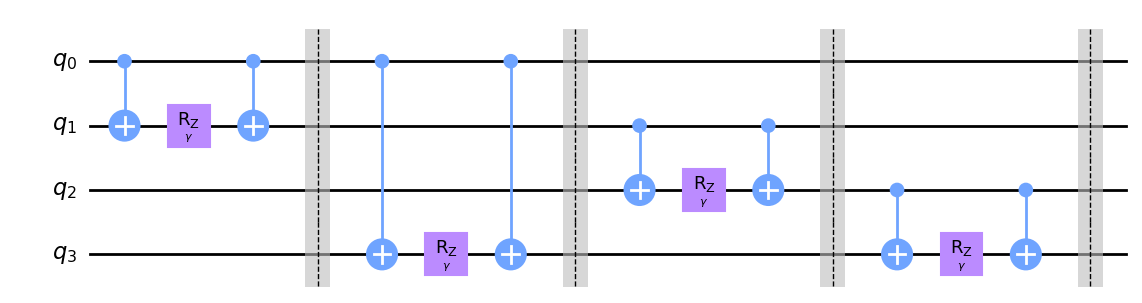

In [20]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(N_QUBITS)
for pair in list(graph.edges()):  # pairs of nodes
    qc_p.rzz(gamma, pair[0], pair[1])
    qc_p.barrier()

qc_p.decompose().draw('mpl')

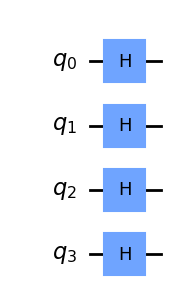

In [21]:
qc_0 = QuantumCircuit(N_QUBITS)
for i in range(N_QUBITS):
    qc_0.h(i)

qc_0.draw('mpl')

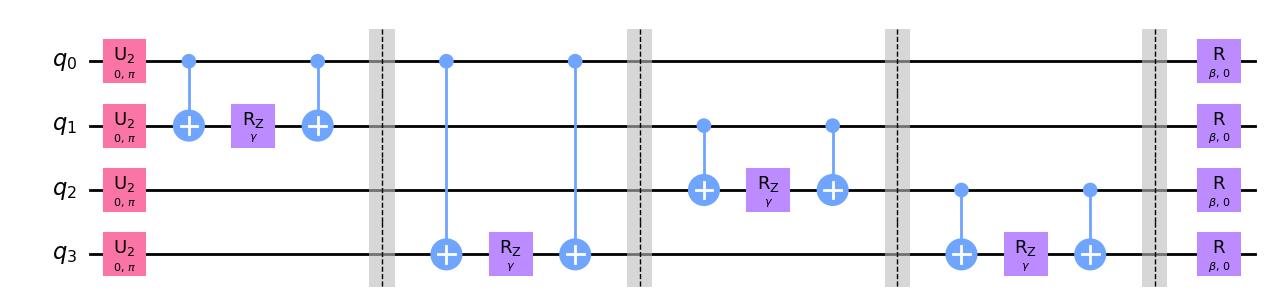

In [22]:
qc_qaoa = QuantumCircuit(N_QUBITS)
qc_qaoa.append(qc_0, range(N_QUBITS))
qc_qaoa.append(qc_p, range(N_QUBITS))
qc_qaoa.append(qc_mix, range(N_QUBITS))

qc_qaoa.decompose().decompose().draw('mpl')

## Summary

1. For combinatorial optimization, the quantum approximate optimization algorithm (QAOA) briefly had a better approximation ratio than any known polynomial time classical algorithm (for a certain problem)

2. The relative speed-up of the quantum algorithm is an open research question

3. The heart of QAOA relies on the use of unitary operators dependent on $2p$ angles, where $p>1$ is a hyperparameter.

4. A rigorous comparison of QAOA with classical algorithms can give estimates on depth $p$ and number of qubits required for quantum advantage. A study of QAOA and MaxCut algorithm shows that $p>11$ is required for scalable advantage.

## short realization of other problems 

The Knapsack problem derives from the problem faced by someone constrained by a fixed-size knapsack who must fill it with the most valuable items.

Given a set of items, each of which has a cost and a value, determine the number of individual items included in a collection such that the total cost is less than or equal to a given threshold and the total value is as large as possible.


### Problem to solve

Suppose there are _eight_ different fires. Each fire requires a specific number of firefighters to keep under control. This is the fire’s associated cost. 

Further, each fire endangers some acres of land. The more it endangers, the better it will be to fight it.

The following is everything we need to solve this problem. We make extensive use of Qiskit. That is IBM’s Quantum SDK.

In [ ]:
!pip install qiskit qiskit_optimization -q

In [23]:
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit_optimization.applications import Knapsack
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer

values=[8, 6, 3, 3, 2, 2, 1, 1]
weights=[4, 4, 3, 1, 1, 2, 3, 4]
max_weight = 10 # the total number of firefighters — capacity.

knapsack = Knapsack(
    values= values,
    weights = weights,
    max_weight=max_weight)

qaoa_optimizer = MinimumEigenOptimizer(QAOA(
    quantum_instance=QuantumInstance(Aer.get_backend("qasm_simulator"))
))

result = qaoa_optimizer.solve(
    knapsack.to_quadratic_program()
)
print("solution:", knapsack.interpret(result))
print("time:", result.min_eigen_solver_result.optimizer_time)

/var/folders/sr/zzpxz8494070jx71t4jy3_4m0000gn/T/ipykernel_59890/1708375345.py:17: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance=QuantumInstance(Aer.get_backend("qasm_simulator"))
/var/folders/sr/zzpxz8494070jx71t4jy3_4m0000gn/T/ipykernel_59890/1708375345.py:16: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa_optimizer = MinimumEigenOptimizer(QAOA(


solution: [0, 2, 3, 5]
time: 26.55681800842285


This work has been supported by the Polish National Agency for Academic Exchange under the Strategic Partnerships programme, grant number BPI/PST/2021/1/00069/U/00001.